# Dynamic Weights

## SVR + Standard Optimization

In [1]:
import pandas as pd

# load data
data = pd.read_csv("adjprice.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.set_index('Date', inplace=True)

# Create a date range that includes all trading days
all_business_days = pd.date_range(start=data.index.min(), end=data.index.max(), freq='B')

# Reindex the data so that it includes only days
data = data.reindex(all_business_days)

# Handle NaN values: Fill in first, then back
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

# 计算每只股票的日收益率
# Calculate the daily yield of each stock
daily_returns = data.pct_change()

# 移除由于填充仍存在的任何NaN
# Remove any NaN that still exists due to padding
daily_returns.dropna(inplace=True)

# 计算每只股票的平均日收益率和标准差
# Calculate the average daily return and standard deviation of each stock
mean_daily_returns = daily_returns.mean()
std_dev_daily_returns = daily_returns.std()

# 无风险利率设为0，计算夏普比率
# Set the risk-free rate to 0 and calculate the Sharpe ratio
risk_free_rate = 0
sharpe_ratios = mean_daily_returns / std_dev_daily_returns

# 选择夏普比率最高的75支股票
# Select the 75 stocks with the highest Sharpe ratio
top_75_stocks = sharpe_ratios.nlargest(75).index

# 创建一个新的DataFrame，仅包含夏普比率最高的75支股票的数据
# Create a new DataFrame that only contains data for the 75 stocks with the highest Sharpe ratio
top_75_data = data[top_75_stocks]

top_75_data

C:\Users\liang\AppData\Local\Temp\ipykernel_16020\3569507337.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\liang\AppData\Local\Temp\ipykernel_16020\3569507337.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


,DHR US Equity,MA US Equity,TDG US Equity,ROST US Equity,ECL US Equity,RAI US Equity,AMZN US Equity,CHD US Equity,MNST US Equity,COO US Equity,...,1520415D US Equity,0574018D US Equity,ADP US Equity,V US Equity,AME US Equity,NFB US Equity,PBCT US Equity,HRL US Equity,HFS US Equity,UTX US Equity
1993-09-07,1.5658,3.686,10.277,0.3421,3.8813,1.337,1.50,1.3839,0.063,0.5491,...,1.7164,6.8315,6.1024,10.1948,2.7765,1.7629,0.4252,1.6989,7.4109,4.237
1993-09-08,1.5658,3.686,10.277,0.3421,3.8813,1.337,1.50,1.3839,0.060,0.5948,...,1.7164,6.8315,6.0868,10.1948,2.7765,1.7439,0.4190,1.6603,7.7610,4.180
1993-09-09,1.5603,3.686,10.277,0.3327,3.9374,1.337,1.50,1.3617,0.057,0.5948,...,1.7428,6.8315,6.0711,10.1948,2.7765,1.7818,0.4127,1.6410,7.7319,4.227
1993-09-10,1.5714,3.686,10.277,0.3421,3.9711,1.337,1.50,1.3987,0.057,0.6406,...,1.7956,6.8773,6.1495,10.1948,2.7765,1.7439,0.4252,1.6893,7.7610,4.331
1993-09-13,1.5770,3.686,10.277,0.3421,3.9599,1.337,1.50,1.4061,0.057,0.6406,...,1.8220,6.8773,6.1809,10.1948,2.7765,1.7250,0.4627,1.6893,7.9361,4.312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-25,143.2100,279.350,498.460,105.5200,198.3300,65.400,1973.82,74.4800,64.160,337.7000,...,35.0000,60.7000,167.0600,181.5900,89.2300,28.0296,16.5400,40.8300,77.4375,136.360
2019-07-26,142.2800,282.070,496.000,106.8300,199.6200,65.400,1943.05,75.8400,65.200,337.9800,...,35.0000,60.7000,169.2700,183.6900,89.2800,28.0296,16.7700,41.3800,77.4375,135.630
2019-07-29,142.6800,281.440,491.350,106.5100,200.6200,65.400,1912.45,76.1200,65.390,341.4900,...,35.0000,60.7000,167.9100,183.2100,88.5500,28.0296,16.5400,41.4400,77.4375,135.720
2019-07-30,142.7000,278.160,486.520,106.3400,205.6800,65.400,1898.53,76.6300,65.510,341.0900,...,35.0000,60.7000,165.0000,181.5300,90.7500,28.0296,16.6400,41.6300,77.4375,135.300


In [2]:
prices = top_75_data

In [3]:
# 特征工程：过去3个月、6个月和12个月的平均收益率、最大收益率和最小收益率，和对应的波动率
# Feature engineering: Average returns, maximum and minimum returns, and corresponding volatility over the past 3, 6 and 12 months

In [4]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error



def train_svr_models(prices):
    stock_models = {}
    cv_results = {}  # Used to store cross-validation results for each stock

    for stock in prices.columns:
        #  Calculate the yield and volatility of each stock
        returns = prices[stock].pct_change().dropna()  #  Calculated rate of return
        volatility = returns.rolling(window=30, min_periods=1).std().fillna(0)  
        # Calculate volatility and populate NaN to prevent data loss

        #  Feature and target variable preparation
        windows = [90, 180, 360]
        features_returns = []
        features_volatility = []

        for window in windows:
            rolling_returns = returns.rolling(window=window, min_periods=1)
            features_returns.append(rolling_returns.mean().fillna(0))
            features_returns.append(rolling_returns.std().fillna(0))
            features_returns.append(rolling_returns.max().fillna(0))
            features_returns.append(rolling_returns.min().fillna(0))

            rolling_vol = volatility.rolling(window=window, min_periods=1)
            features_volatility.append(rolling_vol.mean().fillna(0))
            features_volatility.append(rolling_vol.std().fillna(0))
            features_volatility.append(rolling_vol.max().fillna(0))
            features_volatility.append(rolling_vol.min().fillna(0))

        features_returns_df = pd.concat(features_returns, axis=1)
        features_volatility_df = pd.concat(features_volatility, axis=1)

        scaler_r = StandardScaler()
        X_train_scaled_r = scaler_r.fit_transform(features_returns_df)
        scaler_v = StandardScaler()
        X_train_scaled_v = scaler_v.fit_transform(features_volatility_df)

        # Use TimeSeriesSplit for cross-validation
        tscv = TimeSeriesSplit(n_splits=5)
        scores_r = []
        scores_v = []
        models_r = []
        models_v = []

        for train_index, test_index in tscv.split(X_train_scaled_r):
            X_train, X_test = X_train_scaled_r[train_index], X_train_scaled_r[test_index]
            y_train, y_test = returns.iloc[train_index], returns.iloc[test_index]

            svr_r = SVR(kernel='rbf', C=1e3, gamma=0.1)
            svr_r.fit(X_train, y_train)
            predictions_r = svr_r.predict(X_test)
            scores_r.append(mean_squared_error(y_test, predictions_r))
            models_r.append(svr_r)

        for train_index, test_index in tscv.split(X_train_scaled_v):
            X_train, X_test = X_train_scaled_v[train_index], X_train_scaled_v[test_index]
            y_train, y_test = volatility.iloc[train_index], volatility.iloc[test_index]

            svr_v = SVR(kernel='rbf', C=1e3, gamma=0.1)
            svr_v.fit(X_train, y_train)
            predictions_v = svr_v.predict(X_test)
            scores_v.append(mean_squared_error(y_test, predictions_v))
            models_v.append(svr_v)

        # Select the model with the smallest MSE
        best_svr_r = models_r[np.argmin(scores_r)]
        best_svr_v = models_v[np.argmin(scores_v)]

        stock_models[stock] = (best_svr_r, scaler_r, best_svr_v, scaler_v)
        cv_results[stock] = {'MSE_Returns': scores_r, 'MSE_Volatility': scores_v}

    return stock_models, cv_results





from scipy.optimize import minimize
import numpy as np

def optimize_portfolio(stock_models, forecast_period=360):
    """
    Optimizes the portfolio to maximize the Sharpe ratio based on SVR model predictions.
    
    Args:
    - stock_models (dict): Dictionary containing trained SVR models and scalers for each stock.
    - forecast_period (int): The period over which to predict returns and volatility (default is 360 days).
    
    Returns:
    - dict: Optimal weights and maximum predicted Sharpe ratio.
    """
    stocks = list(stock_models.keys())
    n_stocks = len(stocks)
    
    # Define the objective function to minimize (negative Sharpe Ratio)
    def objective(weights):
        predicted_returns = np.array([
            np.mean(stock_models[stock][0].predict(np.zeros((forecast_period, stock_models[stock][1].n_features_in_)))[-30:])
            for stock in stocks
        ])
        predicted_volatility = np.array([
            np.mean(stock_models[stock][2].predict(np.zeros((forecast_period, stock_models[stock][3].n_features_in_)))[-30:])
            for stock in stocks
        ])
        
        portfolio_return = np.dot(weights, predicted_returns)
        portfolio_volatility = np.sqrt(np.dot(weights**2, predicted_volatility**2))
        
        sharpe_ratio = portfolio_return / portfolio_volatility
        return -sharpe_ratio  # Minimize negative Sharpe Ratio to maximize it
    
    # Constraints and bounds
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights must be 1
    bounds = [(0, 1) for _ in range(n_stocks)]  # Each weight between 0 and 1
    
    # Initial guess (equal distribution)
    initial_weights = np.array([1 / n_stocks] * n_stocks)
    
    # Optimization
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    if result.success:
        optimal_weights = result.x
        max_sharpe_ratio = -result.fun
        return {'weights': optimal_weights, 'max_sharpe_ratio': max_sharpe_ratio}
    else:
        raise Exception("Optimization failed: " + result.message)



In [5]:
def calculate_actual_sharpe_ratio(prices, weights):
    # 计算每日收益率 Calculated daily rate of return
    returns = prices.pct_change().dropna()
    
    # 计算投资组合的日收益率 Calculate the daily rate of return on your portfolio
    portfolio_returns = (returns * weights).sum(axis=1)
    
    # 计算投资组合的平均日收益率和标准差 Calculate the average daily return and standard deviation of the portfolio
    mean_daily_return = portfolio_returns.mean()
    std_daily_return = portfolio_returns.std()
    
    # 年化收益率和年化波动率 Annualized return and annualized volatility
    annualized_return = (1 + mean_daily_return) ** 252 - 1  # 将日收益率转换为年收益率 Convert daily rate of return to annual rate of return
    annualized_volatility = std_daily_return * np.sqrt(252)
    
    # 计算夏普比率 Calculating sharpe ratio
    actual_sharpe_ratio = annualized_return / annualized_volatility
    return actual_sharpe_ratio



In [6]:
from pandas.tseries.offsets import MonthEnd

results = []
for start_date in pd.date_range(start='1999-01-01', end='2017-01-01', freq='M'):
    training_end_date = start_date + pd.DateOffset(months=12) - pd.DateOffset(days=1)  # 保证训练区间是整12个月 Ensure that the training interval is the whole 12 months
    testing_start_date = training_end_date + pd.DateOffset(days=1)  # 测试区间开始于训练区间结束的下一天 The test interval begins the day after the training interval ends
    testing_end_date = testing_start_date + MonthEnd(1)  # 测试区间是下一个月的最后一天 The test period is the last day of the next month


    # 获取训练数据和测试数据 Get training data and test data
    training_prices = prices.loc[start_date:training_end_date]
    testing_prices = prices.loc[testing_start_date:testing_end_date]

    # 训练模型和优化投资组合 Train models and optimize portfolios
    stock_models, cv_results = train_svr_models(training_prices)
    optimization_result = optimize_portfolio(stock_models)
    optimal_weights = optimization_result['weights']
    max_predicted_sharpe = optimization_result['max_sharpe_ratio']

    # 计算实际夏普比率 Calculate the actual Sharpe ratio
    actual_sharpe_ratio = calculate_actual_sharpe_ratio(testing_prices, optimal_weights)

    results.append((start_date, optimal_weights, max_predicted_sharpe, actual_sharpe_ratio))

# 打印每个时间点的权重、最大预测夏普比率以及实际夏普比率
# Print the weights, maximum predicted Sharpe ratio, and actual Sharpe ratio for each point in time
for result in results:
    print(f"Date: {result[0]}")
    print(f"Weights: {result[1]}")
    print(f"Max Predicted Sharpe Ratio: {result[2]}")
    print(f"Actual Sharpe Ratio: {result[3]}")
    print("\n")


C:\Users\liang\AppData\Local\Temp\ipykernel_16020\3247790838.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for start_date in pd.date_range(start='1999-01-01', end='2017-01-01', freq='M'):


Date: 1999-01-31 00:00:00
Weights: [4.53541334e-02 1.21904355e-04 1.21904355e-04 5.57297702e-15
 3.32677708e-02 1.21904355e-04 3.19388124e-03 3.28845339e-02
 1.43064892e-02 2.05122632e-02 1.88745205e-02 1.77191439e-02
 2.01814421e-03 1.21904355e-04 6.13807306e-14 2.95525515e-02
 1.19638759e-02 7.16497017e-03 3.31136810e-02 3.01110094e-02
 3.86506581e-14 3.36326010e-03 3.17250146e-02 4.88281949e-02
 1.21904355e-04 8.33988934e-03 1.07583046e-01 1.62730030e-14
 5.13679820e-14 1.21347801e-02 2.25240550e-02 3.85031327e-03
 1.21904355e-04 5.95208722e-03 1.32457515e-02 1.21904355e-04
 3.55221825e-02 5.28064530e-02 1.21904355e-04 8.30850411e-03
 1.24641842e-14 6.94372167e-03 2.61581408e-14 2.58436195e-02
 2.64012452e-02 3.47602757e-13 3.30995824e-02 1.21904355e-04
 7.59290495e-15 1.21904355e-04 1.21904355e-04 1.21904355e-04
 4.31305028e-02 5.90976257e-14 2.97270473e-02 2.95593955e-15
 1.25388255e-14 6.44898450e-14 7.44182935e-03 1.64802537e-02
 7.62473120e-14 1.21904355e-04 4.31998001e-15 2.34

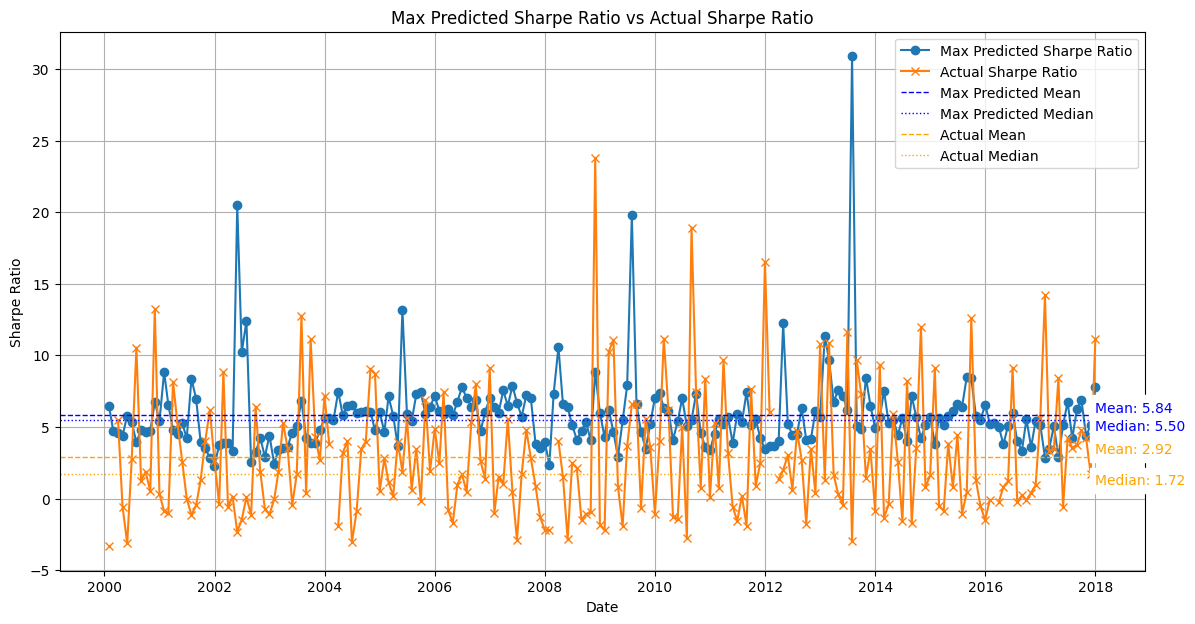

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


results_df = pd.DataFrame(results, columns=['Start Date', 'Optimal Weights', 'Max Predicted Sharpe Ratio', 'Actual Sharpe Ratio'])
results_df['Test Start Date'] = results_df['Start Date'] + pd.DateOffset(months=12)

# 设置 Test Start Date 列为索引
results_df.set_index('Test Start Date', inplace=True)

# 计算 mean 和 median
max_predicted_mean = results_df['Max Predicted Sharpe Ratio'].mean()
max_predicted_median = results_df['Max Predicted Sharpe Ratio'].median()
actual_mean = results_df['Actual Sharpe Ratio'].mean()
actual_median = results_df['Actual Sharpe Ratio'].median()


plt.figure(figsize=(14, 7))

# Max Predicted Sharpe Ratio
plt.plot(results_df.index, results_df['Max Predicted Sharpe Ratio'], label='Max Predicted Sharpe Ratio', marker='o')

#  Actual Sharpe Ratio
plt.plot(results_df.index, results_df['Actual Sharpe Ratio'], label='Actual Sharpe Ratio', marker='x')

# 添加 mean 和 median 的水平线 horizontal line
plt.axhline(y=max_predicted_mean, color='blue', linestyle='--', linewidth=1, label='Max Predicted Mean')
plt.axhline(y=max_predicted_median, color='blue', linestyle=':', linewidth=1, label='Max Predicted Median')
plt.axhline(y=actual_mean, color='orange', linestyle='--', linewidth=1, label='Actual Mean')
plt.axhline(y=actual_median, color='orange', linestyle=':', linewidth=1, label='Actual Median')

# show mean & median -specific value
plt.text(results_df.index[-1], max_predicted_mean, f'Mean: {max_predicted_mean:.2f}', color='blue', va='bottom', ha='left', backgroundcolor='w')
plt.text(results_df.index[-1], max_predicted_median, f'Median: {max_predicted_median:.2f}', color='blue', va='top', ha='left', backgroundcolor='w')
plt.text(results_df.index[-1], actual_mean, f'Mean: {actual_mean:.2f}', color='orange', va='bottom', ha='left', backgroundcolor='w')
plt.text(results_df.index[-1], actual_median, f'Median: {actual_median:.2f}', color='orange', va='top', ha='left', backgroundcolor='w')


plt.title('Max Predicted Sharpe Ratio vs Actual Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')

# 添加网格线 Add gridlines
plt.grid(True)

plt.legend()

plt.show()